In [22]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [23]:
elasticity = pd.read_csv("./output/new-elasticity.csv")

In [24]:
elasticity.head()

,θE,θI,θ,ωij,ωii,trade,shocks,assets
0,-10.059189,-1.000000,-10.059189,0.000357,0.005236,0.007476,1.0,-0.500000
1,-8.777604,-1.009435,-8.787039,0.000509,0.003972,0.013966,1.0,-0.414141
2,-7.786293,-0.843804,-7.630098,0.000172,0.000871,0.021344,1.0,-0.328283
3,-7.603596,-0.847893,-7.451489,0.000092,0.000411,0.024043,1.0,-0.242424
4,-7.078568,-0.783853,-6.862421,0.000055,0.000196,0.029946,1.0,-0.156566


In [25]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

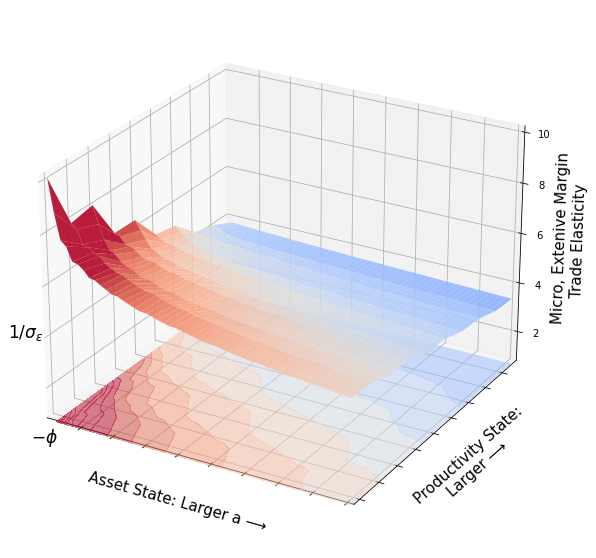

In [26]:
topasset = 4.0

foo = elasticity[elasticity.assets < topasset]

var = "θE"

x, y, z = create_grid(foo,"assets","shocks",var)

fig = plt.figure(figsize = [16.0,10.0])

ax = fig.add_subplot(projection='3d')

factor = 0.65
vmax = -foo[var].min()*factor
vmin = -foo[var].max()*factor

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin= vmin , vmax=vmax),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .5

ax.contourf(x, y, -1*z, 20, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-0.45,topasset)
ax.set_xticklabels([])

ax.set_ylim(0.9,9.7)
ax.set_yticklabels([])

ax.set_zlim(1.0)

ax.text(-.65, 0.25, 0, "$-\phi$", fontsize = 17)

ax.text(-0.95, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State:\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro, Extenive Margin\n Trade Elasticity ", fontsize = 15)

plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight")
plt.savefig("../notes/figures/extensive-elasticity.png", bbox_inches = "tight")

plt.show()

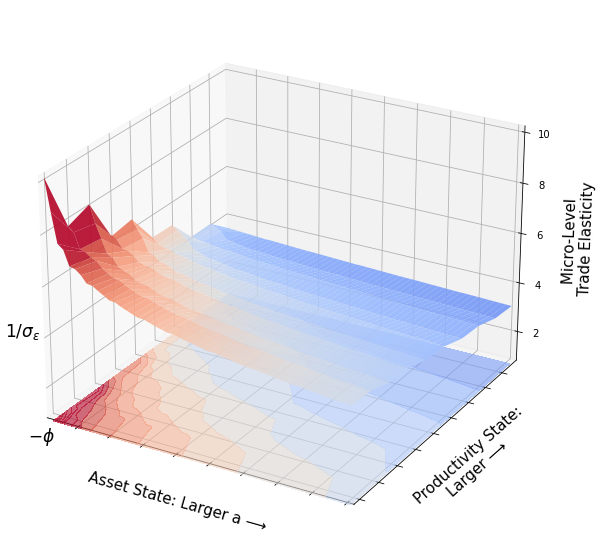

In [27]:
foo = elasticity[elasticity.assets < topasset]

var = "θ"

x, y, z = create_grid(foo,"assets","shocks",var)

fig = plt.figure(figsize = [16.0,10.0])

ax = fig.add_subplot(projection='3d')

factor = 0.70
vmax = -foo[var].min()*factor
vmin = -foo[var].max()*factor

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin= vmin , vmax=vmax),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .5

ax.contourf(x, y, -1*z, 20, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax), 
                 alpha = 0.60, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-.4,topasset)
ax.set_xticklabels([])

ax.set_ylim(0.9,9.7)
ax.set_yticklabels([])

ax.set_zlim(1.0)

ax.text(-.65, 0.25, 0, "$-\phi$", fontsize = 17)

ax.text(-0.95, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State:\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n \n Micro-Level \n Trade Elasticity", fontsize = 15)

plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight")
plt.savefig("../notes/figures/micro-elasticity.png", bbox_inches = "tight")

plt.show()

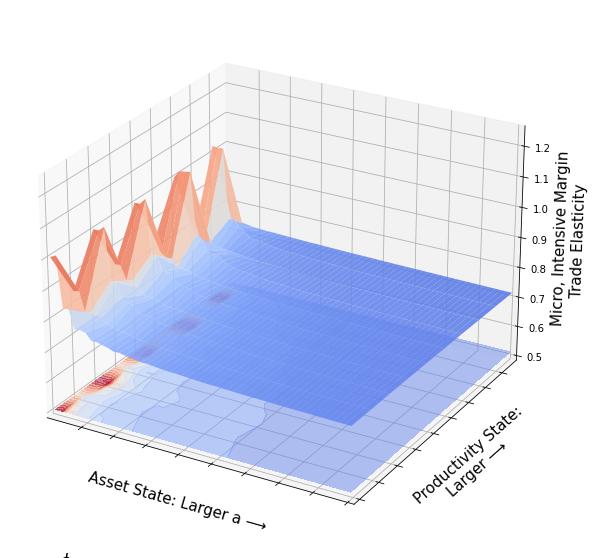

In [28]:
foo = elasticity[elasticity.assets < topasset]

x, y, z = create_grid(foo,"assets","shocks","θI")

fig = plt.figure(figsize = [16.0,10.0])

ax = fig.add_subplot(projection='3d')

factor = .95
vmax = -foo["θI"].min()*factor
vmin = -foo["θI"].max()*factor

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin= vmin , vmax=vmax),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .5

ax.contourf(x, y, -1*z, 20, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-.45,topasset)
ax.set_xticklabels([])

ax.set_ylim(0.9,9.7)
ax.set_yticklabels([])

ax.set_zlim(0.50, 1.25)

ax.text(-.5, 0.25, 0, "$-\phi$", fontsize = 17)

ax.text(-0.95, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State:\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro, Intensive Margin\n Trade Elasticity ", fontsize = 15)

#plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight")
#plt.savefig("../notes/figures/intensive-elasticity.png", bbox_inches = "tight")

plt.show()

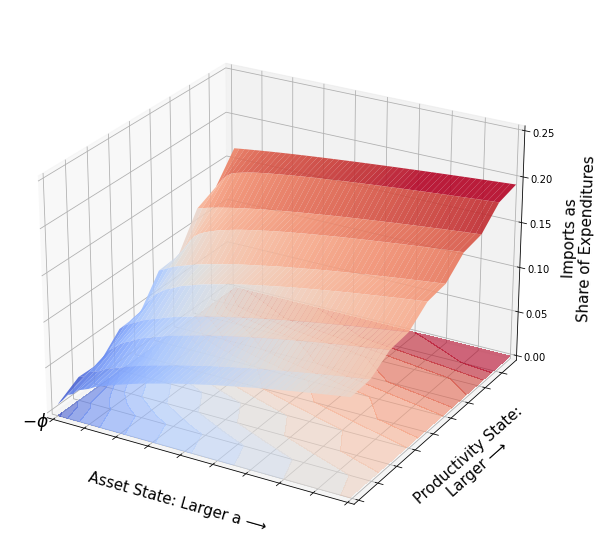

In [29]:
foo = elasticity[elasticity.assets < topasset]

var = "trade"

x, y, z = create_grid(foo,"assets","shocks","trade")

fig = plt.figure(figsize = [16.0,10.0])

#ax = fig.gca(projection='3d')


factor = .95
vmax = foo[var].max()*factor
vmin = foo[var].min()*factor

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.005

ax.contourf(x, y, z, 20, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=vmin, vmax=vmax), 
                  alpha = 0.60, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-.5, topasset)
ax.set_xticklabels([])

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(0.0,0.25)

ax.text(-.65, -0.20, 0, "$-\phi$", fontsize = 17)

ax.set_ylabel("\n Productivity State:\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n \n Imports as\n Share of Expenditures", fontsize = 15)

plt.savefig("../notes/figures/trade-share.png", bbox_inches = "tight")
plt.savefig("../notes/figures/trade-share.pdf", bbox_inches = "tight")

plt.show()